In [19]:
import seaborn as sns
import pandas as pd
import matplotlib as plt
#import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from ydata_profiling import ProfileReport
from statsmodels.stats.multicomp import  pairwise_tukeyhsd

print("Libraries Loaded!")


Libraries Loaded!


Friendly Reminder

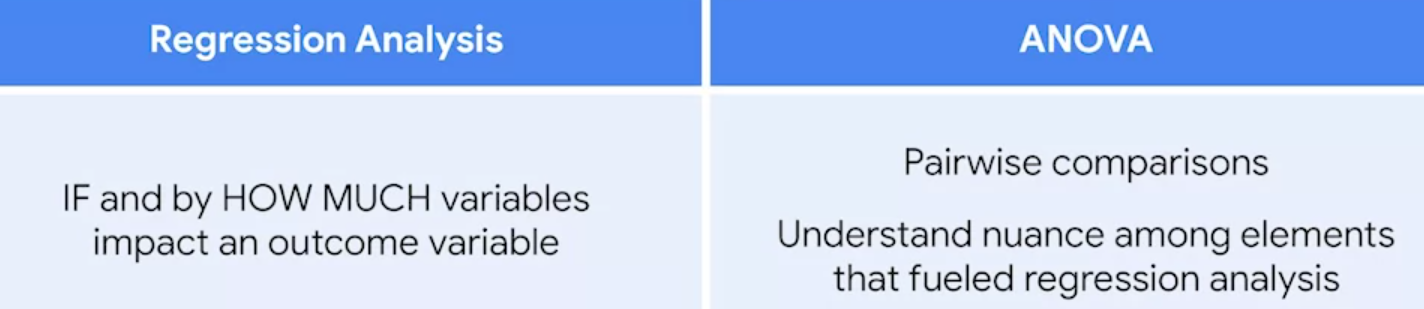


In [7]:
df1 = sns.load_dataset("diamonds")
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='color', ylabel='price'>

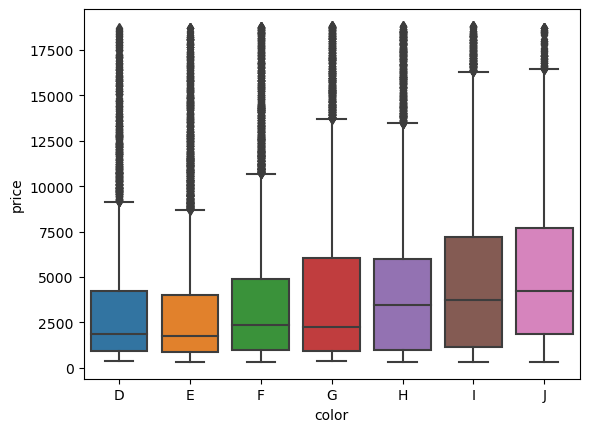

In [8]:
sns.boxplot(x= "color", y= "price", data= df1)

In [10]:
model = ols(formula= "price ~ C(color)", data = df1).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     290.2
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:54:03   Log-Likelihood:            -5.2292e+05
No. Observations:               53940   AIC:                         1.046e+06
Df Residuals:                   53933   BIC:                         1.046e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3169.9541     47.707     66.446      0.000    3076.448    3263.460
C(color)[T.E]   -93.2016     62.047     -1.502      0.133    -214.815      28.411
C(color)[T.F]   554.9323     62.385      8.895      0.000     432.657     677.208
C(color)[T.G]   829.1816     60.345     13.741      0.000     710.905     947.458
C(color)[T.H]  1316.7151     64.287     20.482      0.000    1190.712    1442.718
C(color)[T.I]  1921.9209     71.553     26.860      0.000    1781.676    2062.165
C(color)[T.J]  2153.8639     88.132     24.439      0.000    1981.124    2326.603
==============================================================================
Omnibus:                    14691.760   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33019.415
Skew:                           1.575   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
sm.stats.anova_lm(model, typ= 2)

,sum_sq,df,F,PR(>F)
C(color),2.684911e+10,6.0,290.205881,0.0
Residual,8.316240e+11,53933.0,NaN,NaN


Friendly reminder that there are 3 types of ANOVA
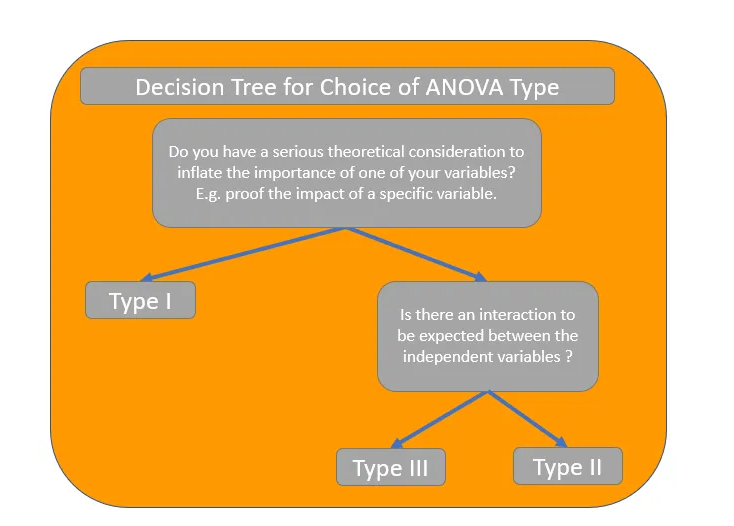

In [15]:
#Now lets do the same but with more variables, just for fun
#using C():C(), for defining the interaction betwen those two factors.
model2 = ols(formula = " price ~  C(color) + C(cut) + C(color):C(cut)", data = df1).fit()

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     73.84
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:59:35   Log-Likelihood:            -5.2255e+05
No. Observations:               53940   AIC:                         1.045e+06
Df Residuals:                   53905   BIC:                         1.045e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2629.0946     73.276     35.879      0.000    2485.472    2772.717
C(color)[T.E]                       -31.5445     96.272     -0.328      0.743    -220.238     157.149
C(color)[T.F]                       745.8448     96.678      7.715      0.000     556.355     935.335
C(color)[T.G]                      1091.6118     92.115     11.851      0.000     911.066    1272.157
C(color)[T.H]                      1260.2403    101.264     12.445      0.000    1061.761    1458.719
C(color)[T.I]                      1822.8758    112.427     16.214      0.000    1602.518    2043.234
C(color)[T.J]                      2289.0918    149.508     15.311      0.000    1996.055    2582.129
C(cut)[T.Premium]                  1002.1980    121.911      8.221      0.000     763.252    1241.144
C(cut)[T.Very Good]                 841.3727    124.205      6.774      0.000     597.930    1084.816
C(cut)[T.Good]                      776.2876    168.392      4.610      0.000     446.238    1106.337
C(cut)[T.Fair]                     1661.9668    314.205      5.289      0.000    1046.122    2277.812
C(color)[T.E]:C(cut)[T.Premium]     -60.8337    158.973     -0.383      0.702    -372.422     250.754
C(color)[T.F]:C(cut)[T.Premium]     -52.2472    159.272     -0.328      0.743    -364.422     259.927
C(color)[T.G]:C(cut)[T.Premium]    -222.1623    152.257     -1.459      0.145    -520.586      76.262
C(color)[T.H]:C(cut)[T.Premium]     325.1739    161.849      2.009      0.045       7.948     642.400
C(color)[T.I]:C(cut)[T.Premium]     492.0123    181.077      2.717      0.007     137.100     846.924
C(color)[T.J]:C(cut)[T.Premium]     374.2072    225.119      1.662      0.096     -67.027     815.441
C(color)[T.E]:C(cut)[T.Very Good]  -224.2707    160.206     -1.400      0.162    -538.277      89.735
C(color)[T.F]:C(cut)[T.Very Good]  -437.4918    162.592     -2.691      0.007    -756.173    -118.811
C(color)[T.G]:C(cut)[T.Very Good]  -689.3253    158.624     -4.346      0.000   -1000.229    -378.421
C(color)[T.H]:C(cut)[T.Very Good]  -195.3172    169.277     -1.154      0.249    -527.101     136.467
C(color)[T.I]:C(cut)[T.Very Good]   -37.4635    187.979     -0.199      0.842    -405.903     330.976
C(color)[T.J]:C(cut)[T.Very Good]  -656.0458    234.209     -2.801      0.005   -1115.098    -196.993
C(color)[T.E]:C(cut)[T.Good]         49.8065    220.373      0.226      0.821    -382.127     481.740
C(color)[T.F]:C(cut)[T.Good]       -655.4767    221.525     -2.959      0.003   -1089.668    -221.286
C(color)[T.G]:C(cut)[T.Good]       -373.5118    221.229     -1.688      0.091    -807.122      60.098
C(color)[T.H]:C(cut)[T.Good]       -389.3675    234.345     -1.662      0.097    -848.685      69.950
C(color)[T.I]:C(cut)[T.

In [17]:
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),2.550704e+10,6.0,279.370558,0.000000e+00
C(cut),9.699679e+09,4.0,159.356253,7.880786e-136
C(color):C(cut),1.653455e+09,24.0,4.527442,1.000780e-12
Residual,8.202709e+11,53905.0,NaN,NaN


In [21]:
tukey_oneway = pairwise_tukeyhsd(endog = df1["price"], groups = df1["color"], alpha=0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-93.2016,0.7437,-276.1437,89.7404,False
D,F,554.9323,0.0,370.9936,738.871,True
D,G,829.1816,0.0,651.2593,1007.1038,True
D,H,1316.7151,0.0,1127.1688,1506.2614,True
D,I,1921.9209,0.0,1710.9515,2132.8902,True
D,J,2153.8639,0.0,1894.0127,2413.7152,True
E,F,648.1339,0.0,481.6095,814.6584,True
E,G,922.3832,0.0,762.5293,1082.2371,True
E,H,1409.9167,0.0,1237.2183,1582.6151,True
E,I,2015.1225,0.0,1819.1505,2211.0945,True


MANOVA -  Is an extension of ANOVA, that compares how two, or more continuous outcome variables, vary according to categorical independent variables.
MANCOVA - Used to test the statistical significance of the effect of one or more independent variables on a set of two or more dependent variables